# Data Project: Koalas

This data set was created by the Queensland government, and is part of the WildNet database. Wildnet contains information on more than 21,000 species including vaious flaura and fauna. This database is used to provide important wildlife information about Queensland's biodiversity and protected areas.

In [119]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gp
from shapely import Point
import fiona
import os
from datetime import datetime

In [3]:
%matplotlib inline

### Importing and unzipping the shp file

In [134]:
shp_file_name = "QLD_STATE_POLYGON_shp.shp"
zip_file_name = "QSC_Extracted_Data_20230812_182957784000-16632"
web_file_path = (
    "https://data.gov.au/data/dataset/2dbbec1a-99a2-4ee5-8806-53bc41d038a7/resource/4c9bcadb-0361-4d79-a6f9-17b470ef9641/download/qld_state_polygon_shp.zip"
)

In [125]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [135]:
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from the internet
done


<Axes: >

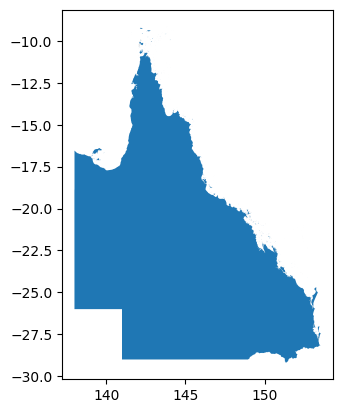

In [136]:
states = gp.read_file(shp_file_name)
states.to_crs(epsg=4326).plot()

### Loading the csv file

In [8]:
if os.path.isfile("wildnetkoalalocations.csv"):
    filepath = "wildnetkoalalocations.csv"
    print("loading from file")
else:
    filepath = "https://apps.des.qld.gov.au/data-sets/wildlife/wildnet/wildnetkoalalocations.csv"
    print("loading from the internet")

koala_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [9]:
koala_data.head()

,Longitude,Latitude,ScientificName,SiteVisitID,StartDate,EndDate,SiteID,SiteCode,LocalityDetails,LocationPrecision,ProjectID,ProjectName,OrganisationID,OrganisationName,OrganisationAcronym
0,151.296471,-24.545575,Phascolarctos cinereus,431601.0,07/07/1997,11/07/1997,426096.0,BL27,MANY PEAKS TIMBER RESERVE - RIDGE LINE ADJACEN...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS
1,152.092977,-25.931061,Phascolarctos cinereus,431099.0,16/06/1997,20/06/1997,425565.0,GR23,NORTH ALONG PLANTED CREEK ROAD 7.6 KM FROM JUN...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS
2,152.670811,-26.844918,Phascolarctos cinereus,431536.0,06/05/1997,06/05/1997,426031.0,BO01,BEACON RD AND BRANDON RD JUNCTION AREA ON BRAN...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS
3,152.088725,-25.965850,Phascolarctos cinereus,431100.0,16/06/1997,20/06/1997,425566.0,GR24,O.8KM FROM MAIN STATE FOREST ENTRANCE ON PLANT...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS
4,152.085490,-25.948846,Phascolarctos cinereus,431094.0,16/06/1997,20/06/1997,425595.0,GR18,2KMS NORTH OF ROAD ENTRANCE OF STATE FOREST BO...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS


### Plotting dates of koalas sighted

In [197]:
date_time = pd.to_datetime(koala_data['StartDate'], dayfirst=True)
koala_data['date_time'] = date_time
koala_data['year'] = koala_data['date_time'].dt.year
koala_data.head()

,Longitude,Latitude,ScientificName,SiteVisitID,StartDate,EndDate,SiteID,SiteCode,LocalityDetails,LocationPrecision,ProjectID,ProjectName,OrganisationID,OrganisationName,OrganisationAcronym,date_time,year,geometry
0,151.296471,-24.545575,Phascolarctos cinereus,431601.0,07/07/1997,11/07/1997,426096.0,BL27,MANY PEAKS TIMBER RESERVE - RIDGE LINE ADJACEN...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-07-07,1997,POINT (151.29647 -24.54557)
1,152.092977,-25.931061,Phascolarctos cinereus,431099.0,16/06/1997,20/06/1997,425565.0,GR23,NORTH ALONG PLANTED CREEK ROAD 7.6 KM FROM JUN...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-06-16,1997,POINT (152.09298 -25.93106)
2,152.670811,-26.844918,Phascolarctos cinereus,431536.0,06/05/1997,06/05/1997,426031.0,BO01,BEACON RD AND BRANDON RD JUNCTION AREA ON BRAN...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-05-06,1997,POINT (152.67081 -26.84492)
3,152.088725,-25.965850,Phascolarctos cinereus,431100.0,16/06/1997,20/06/1997,425566.0,GR24,O.8KM FROM MAIN STATE FOREST ENTRANCE ON PLANT...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-06-16,1997,POINT (152.08872 -25.96585)
4,152.085490,-25.948846,Phascolarctos cinereus,431094.0,16/06/1997,20/06/1997,425595.0,GR18,2KMS NORTH OF ROAD ENTRANCE OF STATE FOREST BO...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-06-16,1997,POINT (152.08549 -25.94885)


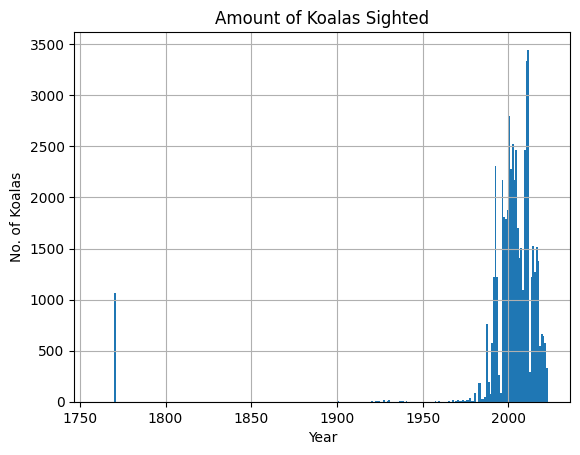

In [199]:
koala_count = koala_data['year']

plt.hist(koala_count, bins = 263, range=[1760, 2023], align='mid')
plt.xlabel("Year")
plt.ylabel("No. of Koalas")
plt.title("Amount of Koalas Sighted")
plt.grid(True)
plt.show()

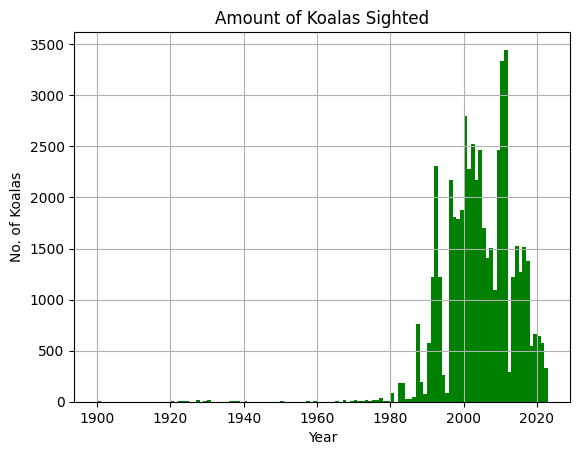

In [231]:
koala_count = koala_data['year']

plt.hist(koala_count, bins = 123, range = [1900, 2023], align='mid', facecolor = 'green')
plt.xlabel("Year")
plt.ylabel("No. of Koalas")
plt.title("Amount of Koalas Sighted")
plt.grid(True)
plt.show()

### Plotting location of koala sighting

In [195]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(koala_data['Longitude'], koala_data['Latitude'])]
koala_data = gp.GeoDataFrame(koala_data, crs = crs, geometry = geometry)
koala_data.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Longitude,Latitude,ScientificName,SiteVisitID,StartDate,EndDate,SiteID,SiteCode,LocalityDetails,LocationPrecision,ProjectID,ProjectName,OrganisationID,OrganisationName,OrganisationAcronym,date_time,year,geometry
0,151.296471,-24.545575,Phascolarctos cinereus,431601.0,07/07/1997,11/07/1997,426096.0,BL27,MANY PEAKS TIMBER RESERVE - RIDGE LINE ADJACEN...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-07-07,1997,POINT (151.29647 -24.54557)
1,152.092977,-25.931061,Phascolarctos cinereus,431099.0,16/06/1997,20/06/1997,425565.0,GR23,NORTH ALONG PLANTED CREEK ROAD 7.6 KM FROM JUN...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-06-16,1997,POINT (152.09298 -25.93106)
2,152.670811,-26.844918,Phascolarctos cinereus,431536.0,06/05/1997,06/05/1997,426031.0,BO01,BEACON RD AND BRANDON RD JUNCTION AREA ON BRAN...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-05-06,1997,POINT (152.67081 -26.84492)
3,152.088725,-25.965850,Phascolarctos cinereus,431100.0,16/06/1997,20/06/1997,425566.0,GR24,O.8KM FROM MAIN STATE FOREST ENTRANCE ON PLANT...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-06-16,1997,POINT (152.08872 -25.96585)
4,152.085490,-25.948846,Phascolarctos cinereus,431094.0,16/06/1997,20/06/1997,425595.0,GR18,2KMS NORTH OF ROAD ENTRANCE OF STATE FOREST BO...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-06-16,1997,POINT (152.08549 -25.94885)


Text(0.5, 23.52222222222222, 'Longitude')

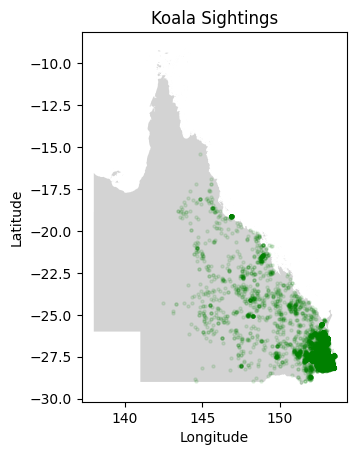

In [205]:
fig,  ax = plt.subplots()
states.plot(ax = ax, color = 'lightgrey')
koala_data.plot(ax = ax, alpha = .1, color = 'green', markersize = 5)
ax.set_title('Koala Sightings')
plt.ylabel('Latitude')
plt.xlabel('Longitude')


In [203]:
koala_floods = koala_data[(koala_data['date_time'] > "2009-12-30") & (koala_data['date_time'] < "2011-01-01")]
koala_floods.head()

,Longitude,Latitude,ScientificName,SiteVisitID,StartDate,EndDate,SiteID,SiteCode,LocalityDetails,LocationPrecision,ProjectID,ProjectName,OrganisationID,OrganisationName,OrganisationAcronym,date_time,year,geometry
1328,152.808900,-26.091800,Phascolarctos cinereus,1165726.0,30/05/2010,30/05/2010,1053113.0,INCIDENTAL,"193 Cunningham Rd, Goomboorian",100.0,11993,Customer Service Records,1,Queensland Parks and Wildlife Service,QPWS,2010-05-30,2010,POINT (152.80890 -26.09180)
1329,152.921530,-27.393310,Phascolarctos cinereus,1165743.0,01/07/2010,01/07/2010,1053130.0,INCIDENTAL,"Samford Rd, Ferny Grove at Wahminda Park",200.0,11993,Customer Service Records,1,Queensland Parks and Wildlife Service,QPWS,2010-07-01,2010,POINT (152.92153 -27.39331)
1330,152.927123,-27.081959,Phascolarctos cinereus,1165674.0,12/05/2010,NaN,1053091.0,INCIDENTAL,"Colburn Way, Bellmere",50.0,11993,Customer Service Records,1,Queensland Parks and Wildlife Service,QPWS,2010-05-12,2010,POINT (152.92712 -27.08196)
1331,152.981197,-27.739511,Phascolarctos cinereus,1165675.0,16/06/2010,NaN,1053092.0,INCIDENTAL,"30-36 Pub Land, Greenbank",150.0,11993,Customer Service Records,1,Queensland Parks and Wildlife Service,QPWS,2010-06-16,2010,POINT (152.98120 -27.73951)
1334,153.000840,-27.432699,Phascolarctos cinereus,1171380.0,27/08/2010,27/08/2010,1058428.0,INCIDENTAL,"68A Banks St, Alderley (next to Banks Street R...",30.0,11993,Customer Service Records,1,Queensland Parks and Wildlife Service,QPWS,2010-08-27,2010,POINT (153.00084 -27.43270)


Text(0.5, 23.52222222222222, 'Longitude')

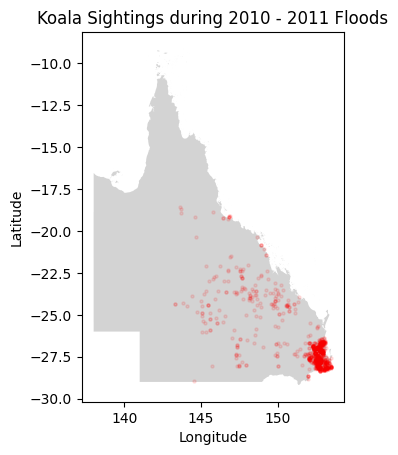

In [230]:
fig,  ax = plt.subplots()
states.plot(ax = ax, color = 'lightgrey')
koala_floods.plot(ax = ax, alpha = .1, color = 'red', markersize = 5)
ax.set_title('Koala Sightings during 2010 - 2011 Floods')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

![The 2011 Brisbane Floods: Causes, Impacts and Implications](https://www.mdpi.com/water/water-03-01149/article_deploy/html/images/water-03-01149-g006.png)

In [228]:
koala_heatmap = koala_data[(koala_data['date_time'] > "1899-12-30") & (koala_data['date_time'] < "2024-01-01")]
koala_heatmap.head()

,Longitude,Latitude,ScientificName,SiteVisitID,StartDate,EndDate,SiteID,SiteCode,LocalityDetails,LocationPrecision,ProjectID,ProjectName,OrganisationID,OrganisationName,OrganisationAcronym,date_time,year,geometry
0,151.296471,-24.545575,Phascolarctos cinereus,431601.0,07/07/1997,11/07/1997,426096.0,BL27,MANY PEAKS TIMBER RESERVE - RIDGE LINE ADJACEN...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-07-07,1997,POINT (151.29647 -24.54557)
1,152.092977,-25.931061,Phascolarctos cinereus,431099.0,16/06/1997,20/06/1997,425565.0,GR23,NORTH ALONG PLANTED CREEK ROAD 7.6 KM FROM JUN...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-06-16,1997,POINT (152.09298 -25.93106)
2,152.670811,-26.844918,Phascolarctos cinereus,431536.0,06/05/1997,06/05/1997,426031.0,BO01,BEACON RD AND BRANDON RD JUNCTION AREA ON BRAN...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-05-06,1997,POINT (152.67081 -26.84492)
3,152.088725,-25.965850,Phascolarctos cinereus,431100.0,16/06/1997,20/06/1997,425566.0,GR24,O.8KM FROM MAIN STATE FOREST ENTRANCE ON PLANT...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-06-16,1997,POINT (152.08872 -25.96585)
4,152.085490,-25.948846,Phascolarctos cinereus,431094.0,16/06/1997,20/06/1997,425595.0,GR18,2KMS NORTH OF ROAD ENTRANCE OF STATE FOREST BO...,500.0,3469,SEQ Comprehensive Regional Assessment Fauna Su...,1,Queensland Parks and Wildlife Service,QPWS,1997-06-16,1997,POINT (152.08549 -25.94885)


Text(0.5, 23.52222222222222, 'Longitude')

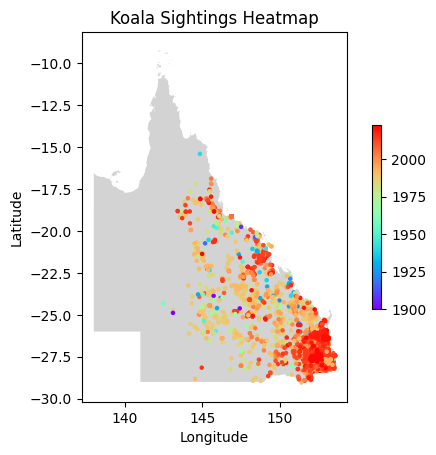

In [236]:
fig,  ax = plt.subplots()
states.plot(ax = ax, color = 'lightgrey')
koala_heatmap.plot(column = 'year', ax = ax, cmap = 'rainbow', legend = True, legend_kwds={'shrink': 0.5}, 
            markersize = 5)
ax.set_title('Koala Sightings Heatmap')
plt.ylabel('Latitude')
plt.xlabel('Longitude')